📂 Files: ['.config', 'digit.jpg', 'digit_recognition_model.h5', 'sample_data']
✅ Model loaded
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
🎯 Identified Number: 1


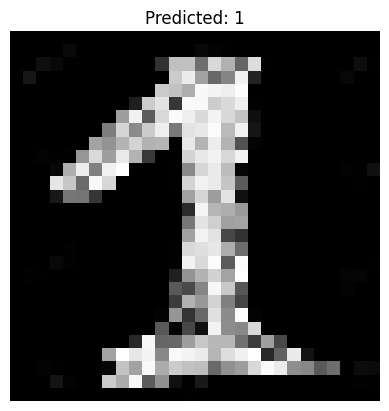

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

print("📂 Files:", os.listdir())

IMAGE_NAME = "digit.jpg"   # <-- MATCHES YOUR FILE

model = tf.keras.models.load_model("digit_recognition_model.h5")
print("✅ Model loaded")

img = cv2.imread(IMAGE_NAME, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise ValueError("❌ Image not found")

# Resize larger
img = cv2.resize(img, (100, 100))

# Invert if background is white
if np.mean(img) > 127:
    img = cv2.bitwise_not(img)

# Resize to MNIST size
img = cv2.resize(img, (28, 28))

# Normalize
img = img / 255.0

# Reshape
img = img.reshape(1, 28, 28, 1)

# Predict
prediction = model.predict(img)
digit = np.argmax(prediction)

print("🎯 Identified Number:", digit)

plt.imshow(img.reshape(28,28), cmap="gray")
plt.title(f"Predicted: {digit}")
plt.axis("off")
plt.show()


In [ ]:
!ls


sample_data
